<a href="https://colab.research.google.com/github/edwwwi/Budget/blob/main/Obesity_Prediction_Training_Random_Forest_(Obesity_data_Dataset2)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()   # Upload 'obesity_data.csv'

# Read dataset
df = pd.read_csv('obesity_data.csv')
print("✅ Dataset Loaded Successfully!\n")
df.head()


Saving obesity_data.csv to obesity_data.csv
✅ Dataset Loaded Successfully!



,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [ ]:
# Step 3: Basic Info
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Encode categorical variables (Gender, ObesityCategory)
label_enc = LabelEncoder()

df['Gender'] = label_enc.fit_transform(df['Gender'])   # Male/Female → 1/0
df['ObesityCategory'] = label_enc.fit_transform(df['ObesityCategory'])  # Labels → numeric

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB
None

Missing values:
 Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0


In [ ]:
# Step 5: Define features and target
X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

# Step 6: Normalize/Scale numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data Split Complete!")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


✅ Data Split Complete!
Training Samples: 800
Testing Samples: 200


In [ ]:
# Step 8: Train model
rf = RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = rf.predict(X_test)


In [ ]:
# Step 10: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 99.5 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      0.97      0.98        32
           2       0.98      1.00      0.99        65
           3       1.00      1.00      1.00        31

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
 [[72  0  0  0]
 [ 0 31  1  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]


# *Feature Imporatnce*

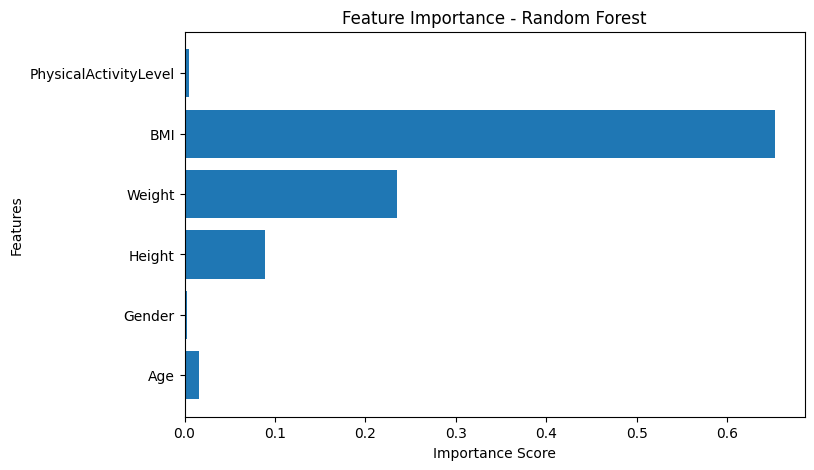

In [ ]:
# Step 11: Visualize important features
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[72  0  0  0]
 [ 0 31  1  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]


In [ ]:
pip install skl2onnx

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Define initial types for the ONNX model input.
# The input feature vector length should match the number of features in X_scaled.
# X_scaled has shape (n_samples, n_features).
initial_type = [('float_input', FloatTensorType([None, X_scaled.shape[1]]))]

# Convert the scikit-learn RandomForestClassifier to ONNX format
onx = convert_sklearn(rf, initial_types=initial_type, target_opset=11)

print("✅ Model converted to ONNX format!")

✅ Model converted to ONNX format!


In [ ]:
# Save the ONNX model to a file
with open("random_forest_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

print("✅ ONNX model saved successfully as 'random_forest_model.onnx'!")

✅ ONNX model saved successfully as 'random_forest_model.onnx'!


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print("CV F1-score:", scores.mean())


CV F1-score: 0.9948350315278063
